# Установка нужных библиотек

In [186]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    !git clone -qq https://github.com/Intelligent-Systems-Phystech/ProjectTemplate.git /tmp/repo
    !python3 -m pip install -qq /tmp/repo/src/ && rm -rf /tmp/repo

# Импорт библиотек

In [244]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Настройка окружения

In [245]:
if IN_COLAB:
    figures = '.'
else:
    figures = '../figures'

## 1. Квадратичная задача

### Описание задачи

In [268]:
func_name = "quadratic"
d = 100
L = 1000
mu = 1
sigma = 1e-2

args = init_experiment(func_name, d, seed=18, L=L, mu=mu)

sett = R()
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

### Поиск точного решения

In [269]:
def learning_rate(k):
    return 1./(k+1000)

In [270]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)
TrueGradient = TrueGradientApproximator(func_name, args=args)

GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|██████████████████████████████████████████| 10000/10000 [00:00<00:00, 31331.99it/s]


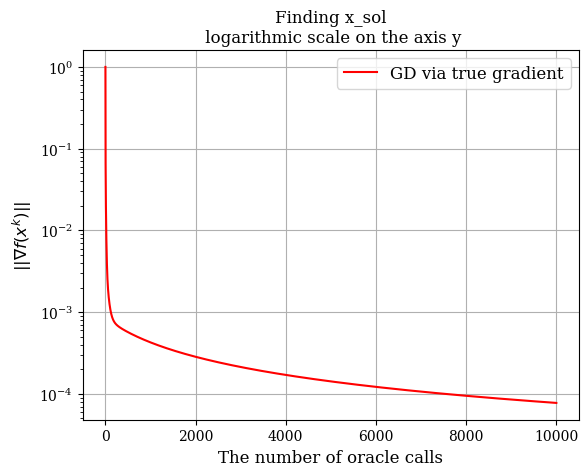

In [271]:
make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
x_sol = GD.x_curr

In [283]:
def learning_rate_GD(k):
    return 1./L

def learning_rate_AcceleratedGD(k):
    return 0.75/L

def learning_rate_Nesterov(k):
    return 1./L

In [293]:
Turtle = TurtleApproximator(oracle, gamma=1e-5)

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.9

optimizers_list = [
    GDOptimizer(Turtle, learning_rate_GD, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4),
    AcceleratedGDOptimizer(Turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol=x_sol, max_oracle_calls=10**4),
    NesterovOptimizer(Turtle, learning_rate_Nesterov, x_0, momentum, sett, x_sol=x_sol, max_oracle_calls=10**4),
]

for opt in optimizers_list:
    opt.optimize()

100%|█████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.09it/s]


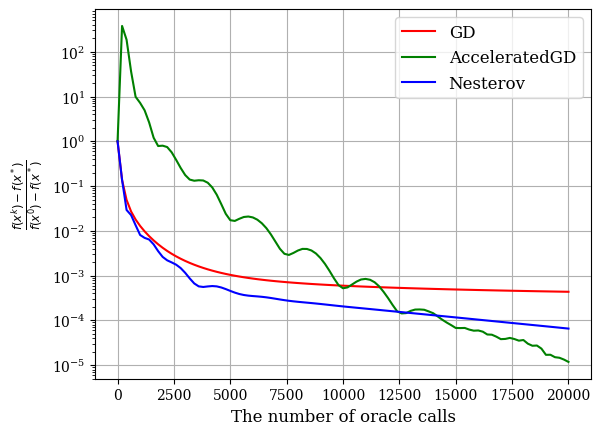

In [294]:
make_err_plot(optimizers_list)

## 2. Логистическая регрессия

In [196]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 20

args = init_experiment(func_name, d, sigma=sigma)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [197]:
def learning_rate(k):
    return 1./ (10 * L)

In [198]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|████████████████████████████████████████████| 10000/10000 [00:29<00:00, 344.67it/s]


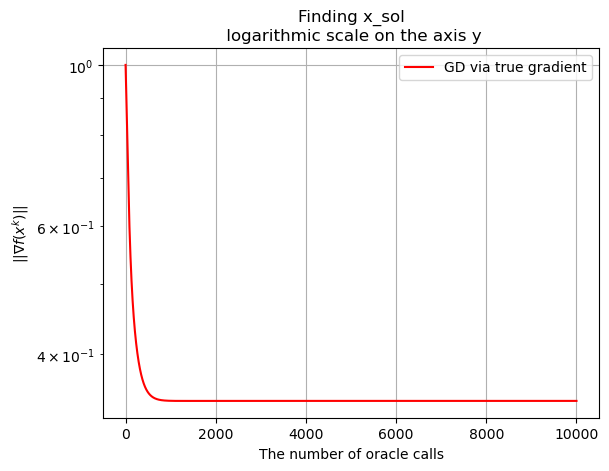

0.5


In [199]:
make_err_plot([GD], labels=["GD via true gradient"], title='Finding x_sol')
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [222]:
Turtle = TurtleApproximator(oracle, gamma=1e-5)

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.9

optimizers_list = [
    GDOptimizer(Turtle, learning_rate_GD, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4),
    AcceleratedGDOptimizer(Turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol=x_sol, max_oracle_calls=10**4),
    NesterovOptimizer(Turtle, learning_rate_Nesterov, x_0, momentum, sett, x_sol=x_sol, max_oracle_calls=10**4),
]

for opt in optimizers_list:
    opt.optimize()

100%|███████████████████████████████████████████████████| 89/89 [05:24<00:00,  3.65s/it]


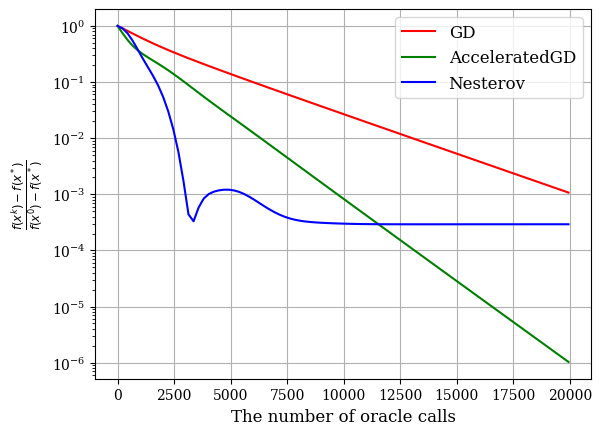

In [230]:
make_err_plot(optimizers_list, title=None, save_name='Non_stochastic_Logreg_GD_AGD_Nesterov')

## Обучение одной модели